# SPOTIFY GENRE CLASSIFICATION & RECOMMENDATION SYSTEM

TABLE OF CONTENT

[Introduction](#Introduction)

Genre Classification

1. [Import libraries and data](#Import-libraries-and-data)
2. [Data cleaning and preparation](#Data-cleaning-and-preparation)
3. [EDA](#EDA)
4. [Train & Test](#Train-&-test)

Machine Learning models:
1) [Multiple Logistic Regression](#Multiple-Logistic-Regression)
2) [Hierarchical Clustering](#Hierarchical-Clustering)
3) [K-means](#K-means)
4) [KNN](#KNN-nearest-neighbors)
5) [Decision Trees](#Decision-trees)
6) [Random Forest](#Random-Forest)
7) [Neural Networks](#Neural-Networks)
8) [PCA dimensionality reduction](#PCA-dimensionality-reduction)

Recommendation system with KNN

1) [Recommendation system](#Recommendation-System-with-KNN)


[Conclusion](#Conclusion)


    



# Introduction

Music streaming platforms like Spotify have transformed how we listen to music, providing access to vast libraries and detailed song data. This project uses the Spotify Songs dataset spotify_songs.csv from Kaggle, featuring 30,000 songs with various audio features and metadata.

The primary objectives of this project are to:

1) Data Cleaning and Preparation: We will begin by meticulously cleaning and preparing the dataset. This includes handling missing values, standarizing data, and transforming features to ensure they are suitable for machine learning models.

2) Genre Classification: Develop machine learning models to accurately classify songs into various genres based on their audio features and metadata. This will help understand the characteristics that define different genres and how songs can be categorized effectively.

3) Song Recommendation: Build a recommendation system that suggests songs to users based on their similarities. By analyzing patterns in the data, the system will provide recommendations, enhancing the user experience by introducing them to new and relevant music.

For academic purposes several machine learning methods are presented, instead of only the most effective ones. 
This project aims to harness the power of machine learning to provide valuable insights into music data and enhance the user experience on music streaming platforms. We gain practical experience in using machine learning algorithms and neural networks, including understanding the theoretical concepts, implementing the models, and fine-tuning them to achieve optimal performance. Additionally, the project serves as a hands-on opportunity to learn how to effectively apply these advanced techniques to real-world data.


# Import libraries and data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import math

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, log_loss
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [3]:
# hide warnings
import warnings 
warnings.filterwarnings('ignore')

In [4]:
df_entera = pd.read_csv('spotify_songs.csv')

In [5]:
df = df_entera.copy()
df.shape

(32833, 23)

In [17]:
# main stats per column (num)

df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [19]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

# Data cleaning and preparation

### Nulls

In [21]:
# % de nulls por columna

df.isnull().sum()/len(df)*100

track_id                    0.000000
track_name                  0.015229
track_artist                0.015229
track_popularity            0.000000
track_album_id              0.000000
track_album_name            0.015229
track_album_release_date    0.000000
playlist_name               0.000000
playlist_id                 0.000000
playlist_genre              0.000000
playlist_subgenre           0.000000
danceability                0.000000
energy                      0.000000
key                         0.000000
loudness                    0.000000
mode                        0.000000
speechiness                 0.000000
acousticness                0.000000
instrumentalness            0.000000
liveness                    0.000000
valence                     0.000000
tempo                       0.000000
duration_ms                 0.000000
dtype: float64

In [23]:
# Check where are those nulls

nulls =  df[df.isnull().any(axis=1)]
nulls

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
8151,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707
9282,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235
9283,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465
19568,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,latin,...,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773
19811,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,latin,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707


In [11]:
# Only 15 NAs, 5 songs without track_name, track_artist and track_album_name  

df = df.fillna('unknown')

### Duplicates

In [27]:
# There are 4477 identical track_ids but classified in different playlists
# That's why the total duplicates appears to be 0

df['track_id'].duplicated().sum()

4477

In [13]:
# Drop duplicates using track_id 

df = df.drop_duplicates(subset=['track_id'])
df.shape

(28356, 23)

For the recommendation system, test it keeping the duplicates so you can check if it recommends the most similar songs which should be the duplicates.

### Dates to Year

In [15]:
# Make a copy of the original column before converting it

df['original_date'] = df['track_album_release_date']

In [17]:
# errors='coerce' for data not convertible with datetime
# replace those to NaT (Not a Time), equivalent to NaN (Not a Number) 
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')


In [19]:
# mask to store values True for NA

mask = df['track_album_release_date'].isna()

- Process the dates that are NaT to extract only the year from the original column.
- Use str[:4] because it assumes that the NAs (after the first transformation) in the original data only have the year, so they will have an entry with 4 characters.
- For this, use mask as a filter on the 'original date' that you haven't changed to NA yet.
- Transform those 4 characters str[:4] to format='%Y' and where it doesn't match, meaning there aren't 4 characters that can be converted to year format, it sets them to NA again.

In [21]:
# Uses str[:4] because it assumes that the NAs (after the first transformation) in the original data only have the year, so they will have an entry with 4 characters
df.loc[mask, 'track_album_release_date'] = pd.to_datetime(df.loc[mask, 'original_date'].str[:4], format='%Y', errors='coerce')

In [23]:
# Extract just the year
df['year'] = df['track_album_release_date'].dt.year

### Select columns

In [25]:
# I keep year so these 2 can be dropped

df = df.drop(['original_date', 'track_album_release_date'], axis=1)

In [27]:
# Playlist_genre is the result variable
# X all numeric variables - no dummies 

X_num = df[['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
        'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'year']]
y = df['playlist_genre']

In [29]:
# Encode the result variable to work easier with it

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


### Standarization

In [31]:
# standarize variables 
scaler = StandardScaler()
X = scaler.fit_transform(X_num)

In [33]:
# After the standarization X is an array - I convert it to df

X = pd.DataFrame(X, columns = ['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
        'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'year'])
X


,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
0,1.125233,0.649101,1.185900,0.174883,1.377943,0.876574,-0.484169,-0.337416,-0.391826,-0.806061,0.032489,0.040061,-0.521011,0.707628
1,1.167424,0.498191,0.635491,1.558453,0.608887,0.876574,-0.688938,-0.470271,-0.373722,1.065111,0.779281,-0.778516,-1.047458,0.707628
2,1.293996,0.148356,1.267644,-1.208686,1.115114,-1.140805,-0.329129,-0.438853,-0.391725,-0.519324,0.437891,0.113223,-0.817978,0.707628
3,0.872089,0.443315,1.262195,0.451597,1.001155,0.876574,-0.058053,-0.666412,-0.391785,0.083660,-0.995949,0.037093,-0.941150,0.707628
4,1.251805,-0.023132,0.733584,-1.208686,0.706707,0.876574,-0.702589,-0.434813,-0.391826,-0.690597,0.915837,0.112036,-0.614368,0.707628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28351,0.112659,-1.545946,1.218598,-0.931972,1.648018,0.876574,-0.139961,-0.451420,-0.391826,-0.796439,-1.281864,0.267634,-0.363489,0.262353
28352,-0.815535,-0.901151,0.477453,-1.485400,0.775873,0.876574,-0.643109,-0.787552,-0.373464,1.180576,-0.471061,0.262848,2.071864,0.173298
28353,-1.068678,-0.853135,0.668189,0.174883,0.631942,-1.140805,-0.583628,-0.310486,-0.391821,-0.262735,-0.317436,0.260919,-0.269559,0.262353
28354,-1.026488,-0.187761,1.033312,-0.931972,1.138498,0.876574,0.010203,-0.759680,0.154307,0.975305,-0.863660,0.261623,2.306190,0.262353


# EDA

<Axes: xlabel='playlist_genre', ylabel='count'>

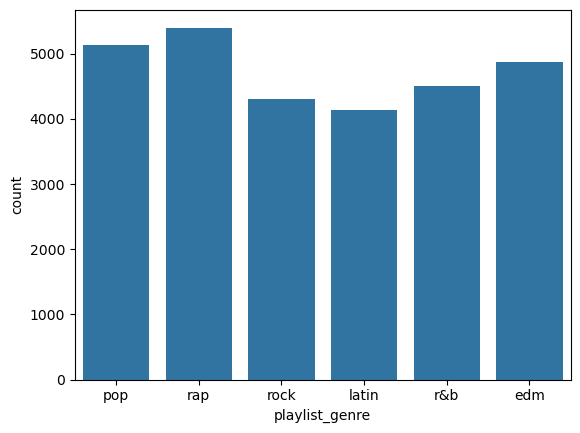

In [49]:
# Songs per genre

sns.countplot(data=df, x='playlist_genre')

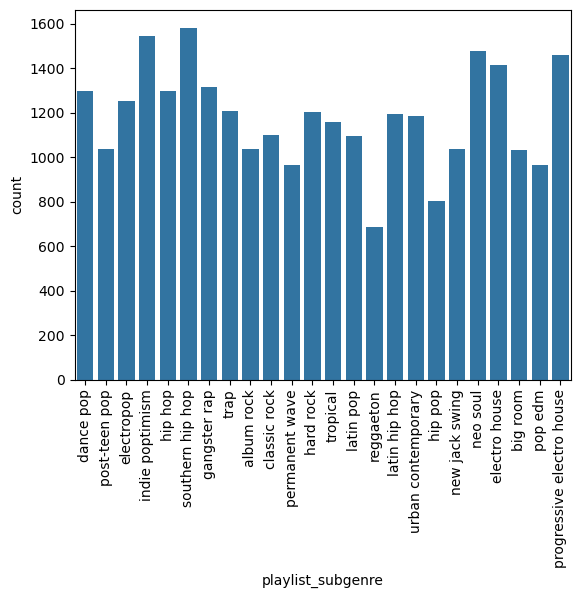

In [66]:
# Songs per subgenre

sns.countplot(data=df, x='playlist_subgenre')
plt.xticks(rotation=90)
plt.show()

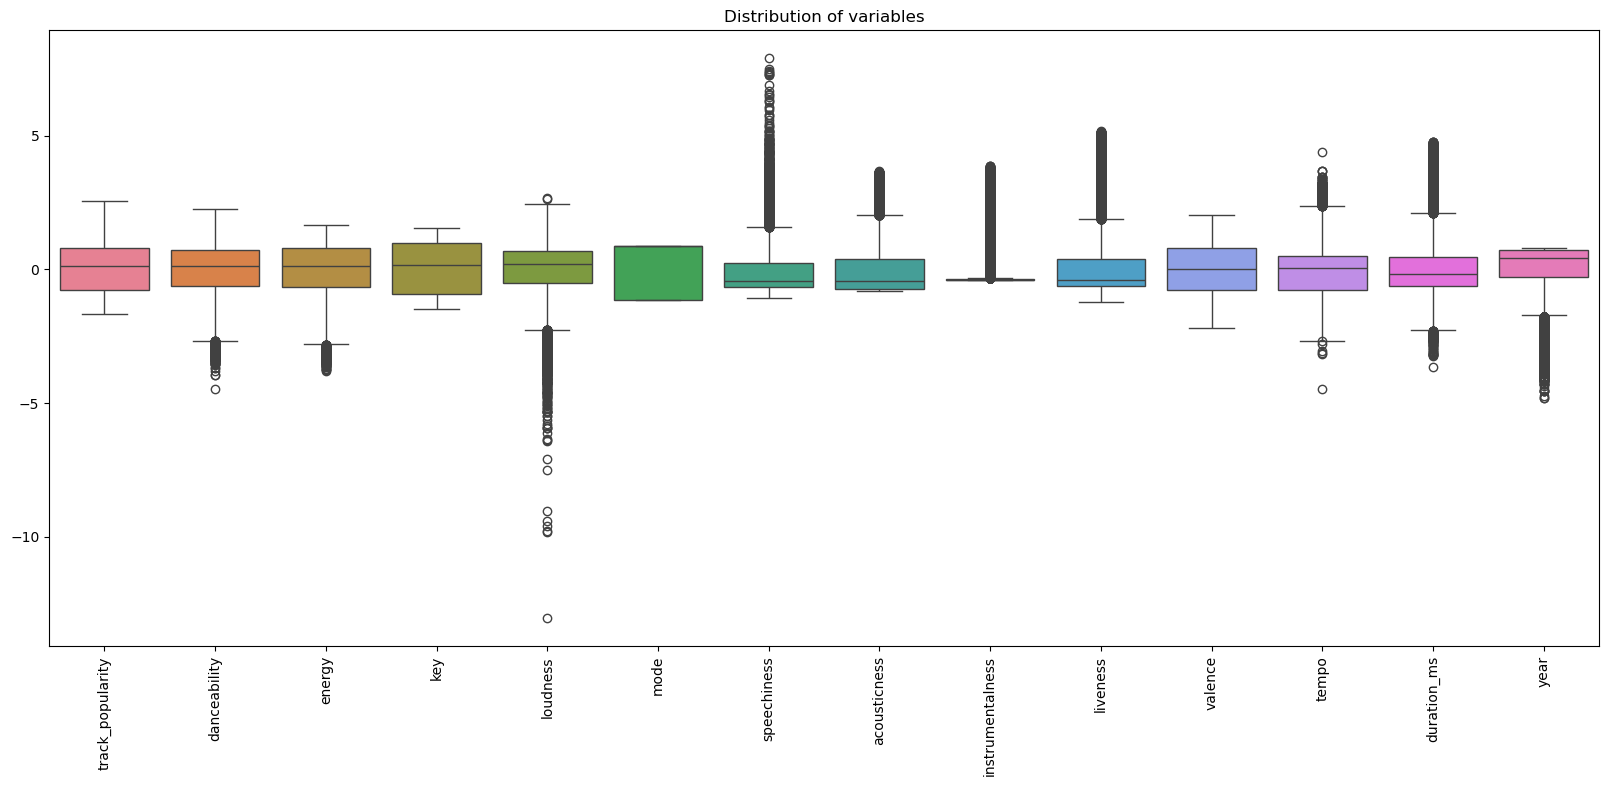

In [39]:
# checking for outliers 
plt.figure(figsize=(20, 8))
sns.boxplot(data=X)
plt.title('Distribution of variables')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='year', ylabel='duration_ms'>

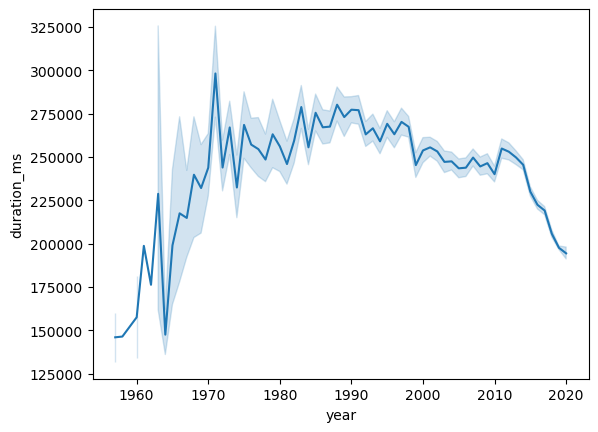

In [69]:
# Song durantion over time

sns.lineplot(data = df, x= 'year', y= 'duration_ms')

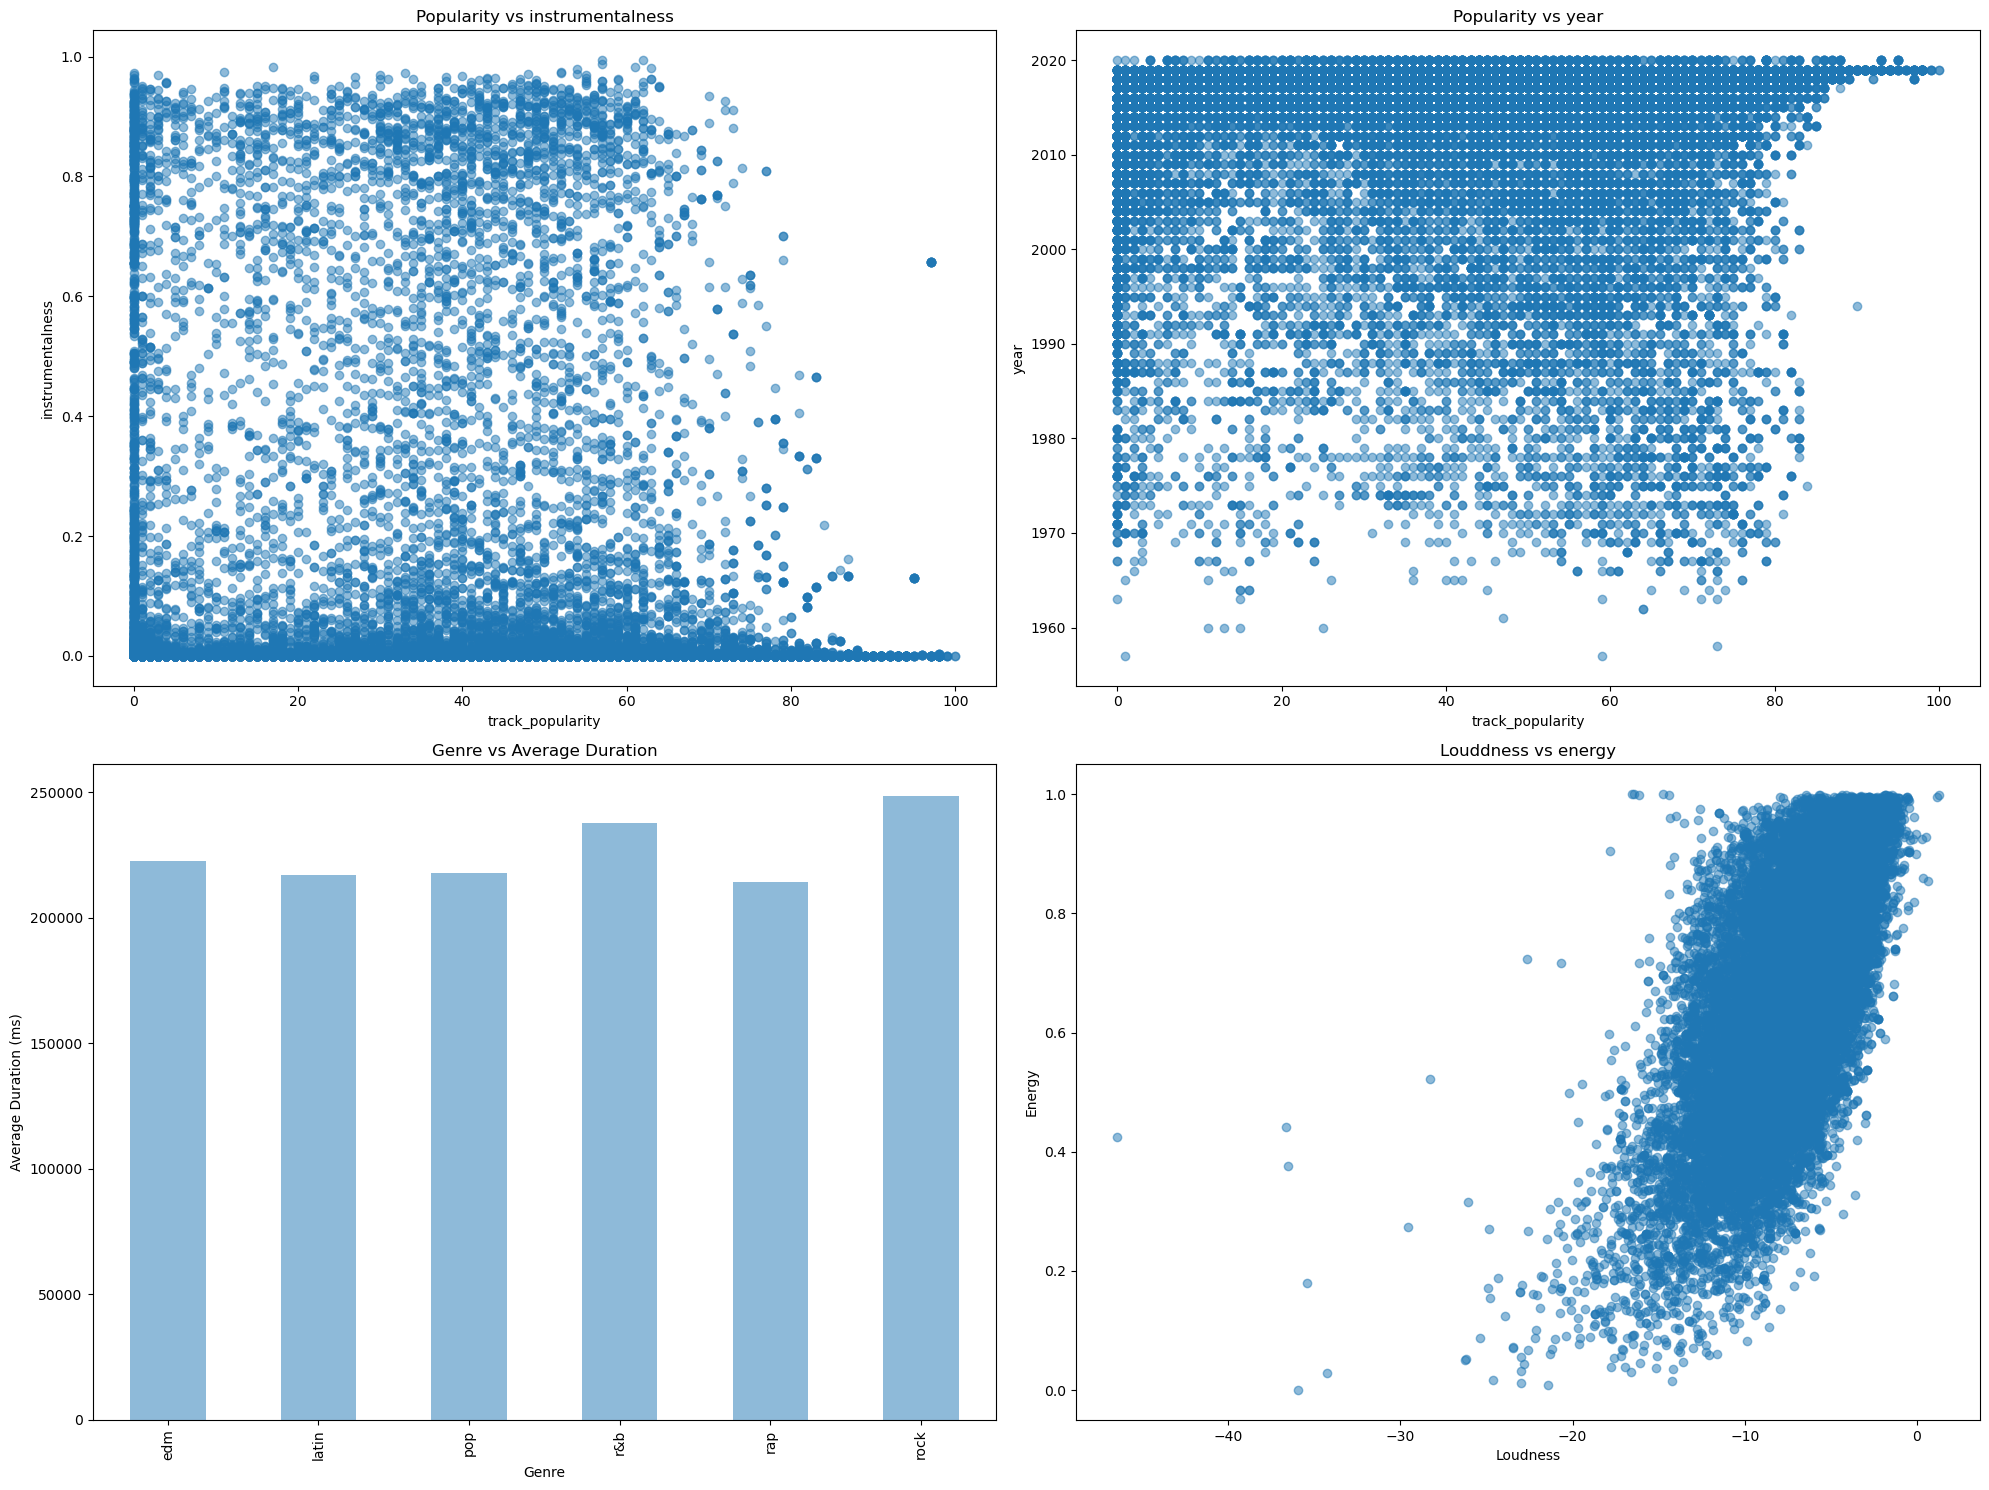

In [35]:
# Creating a grid most correlated variables
fig, axs = plt.subplots(2, 2, figsize=(20, 15))

# Popularity vs energy
axs[0, 0].scatter(df['track_popularity'], df['instrumentalness'], alpha=0.5)
axs[0, 0].set_title('Popularity vs instrumentalness')
axs[0, 0].set_xlabel('track_popularity')
axs[0, 0].set_ylabel('instrumentalness')

# Popularity vs year
axs[0, 1].scatter(df['track_popularity'], df['year'], alpha=0.5)
axs[0, 1].set_title('Popularity vs year')
axs[0, 1].set_xlabel('track_popularity')
axs[0, 1].set_ylabel('year')

# Genre vs duration
avg_duration_by_genre = df.groupby('playlist_genre')['duration_ms'].mean()
avg_duration_by_genre.plot(kind='bar', ax=axs[1, 0], alpha=0.5)
axs[1, 0].set_title('Genre vs Average Duration')
axs[1, 0].set_xlabel('Genre')
axs[1, 0].set_ylabel('Average Duration (ms)')

# Loudness vs energy
axs[1, 1].scatter(df['loudness'], df['energy'], alpha=0.5)
axs[1, 1].set_title('Louddness vs energy')
axs[1, 1].set_xlabel('Loudness')
axs[1, 1].set_ylabel('Energy')


plt.tight_layout()
plt.show()

### Histograms per column

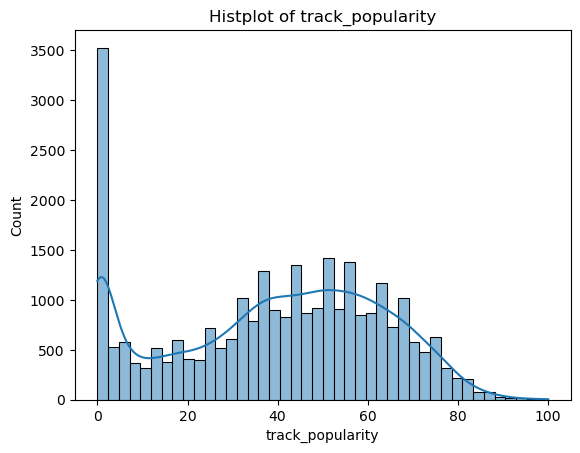

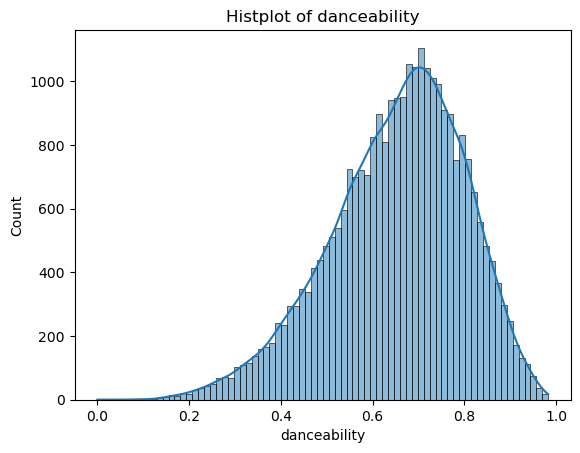

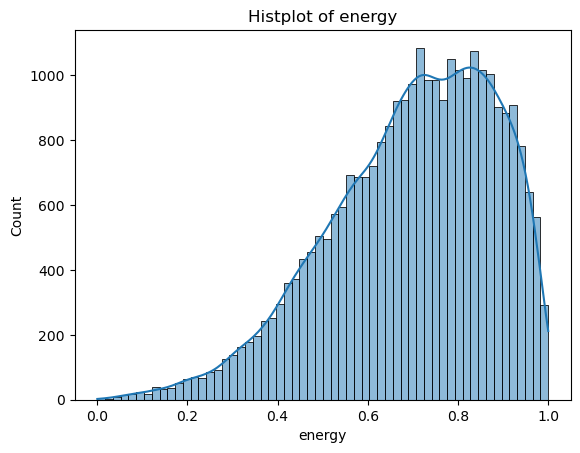

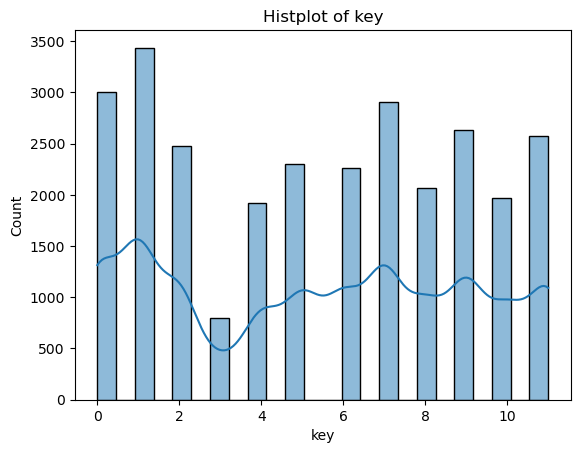

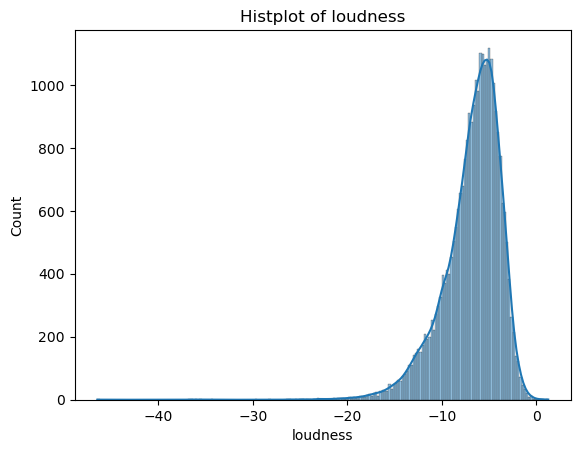

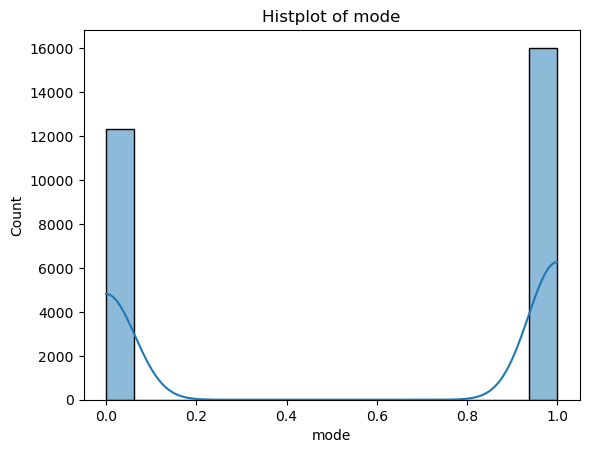

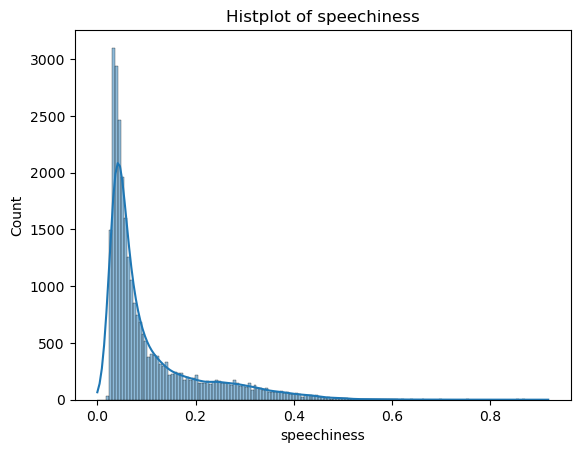

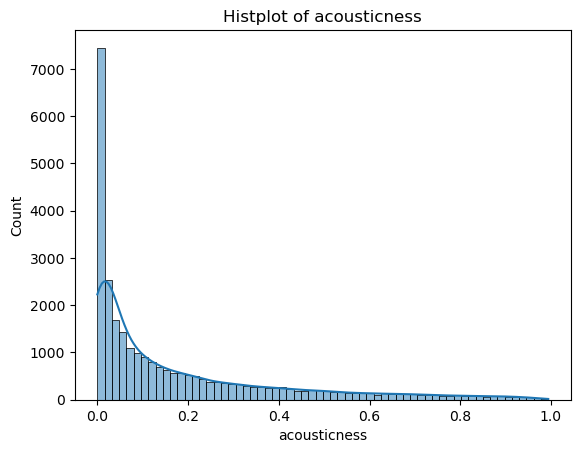

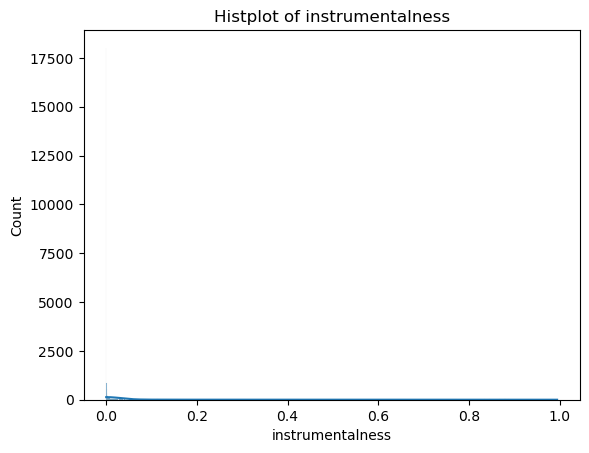

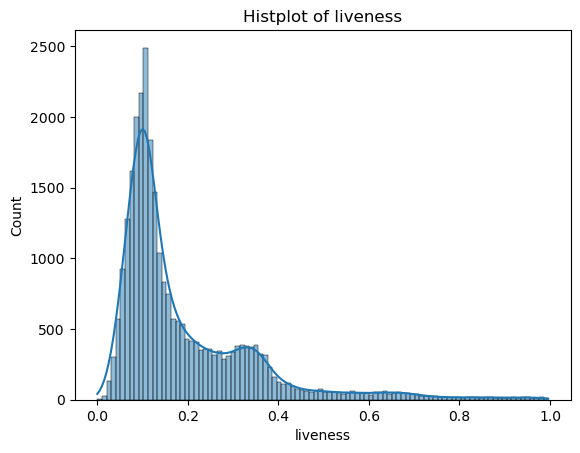

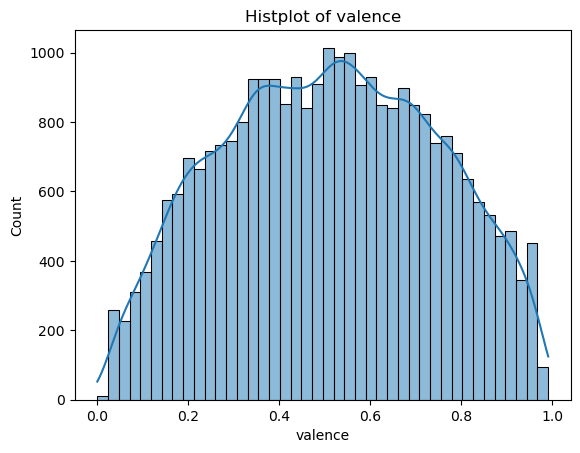

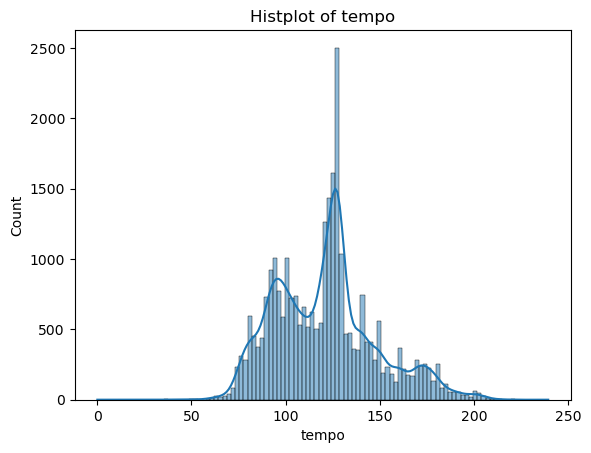

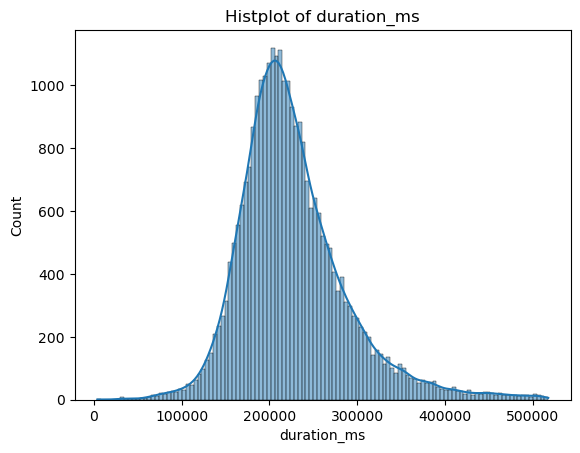

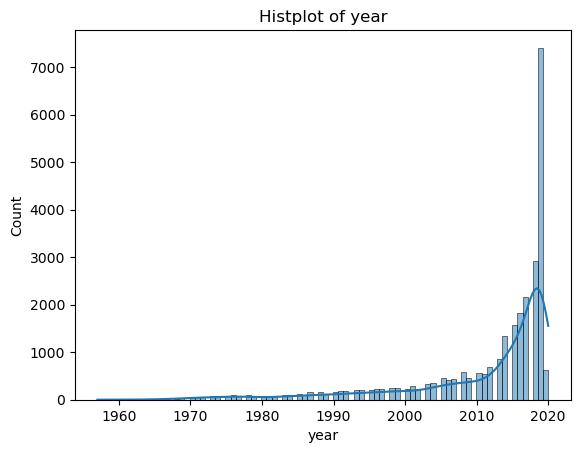

In [43]:
for col in X.columns:
    sns.histplot(X[col], kde = True)
    plt.title(f'Histplot of {col}')
    plt.show()
    


## Correlation Matrix

In [52]:
# Select only numeric variables - I could have used X
# Check the correlation between variables 
# Result variable 'playlist_genre' not included

dfCorr = df.select_dtypes(include=['float64', 'int64', 'int32'])
matriz = dfCorr.corr()

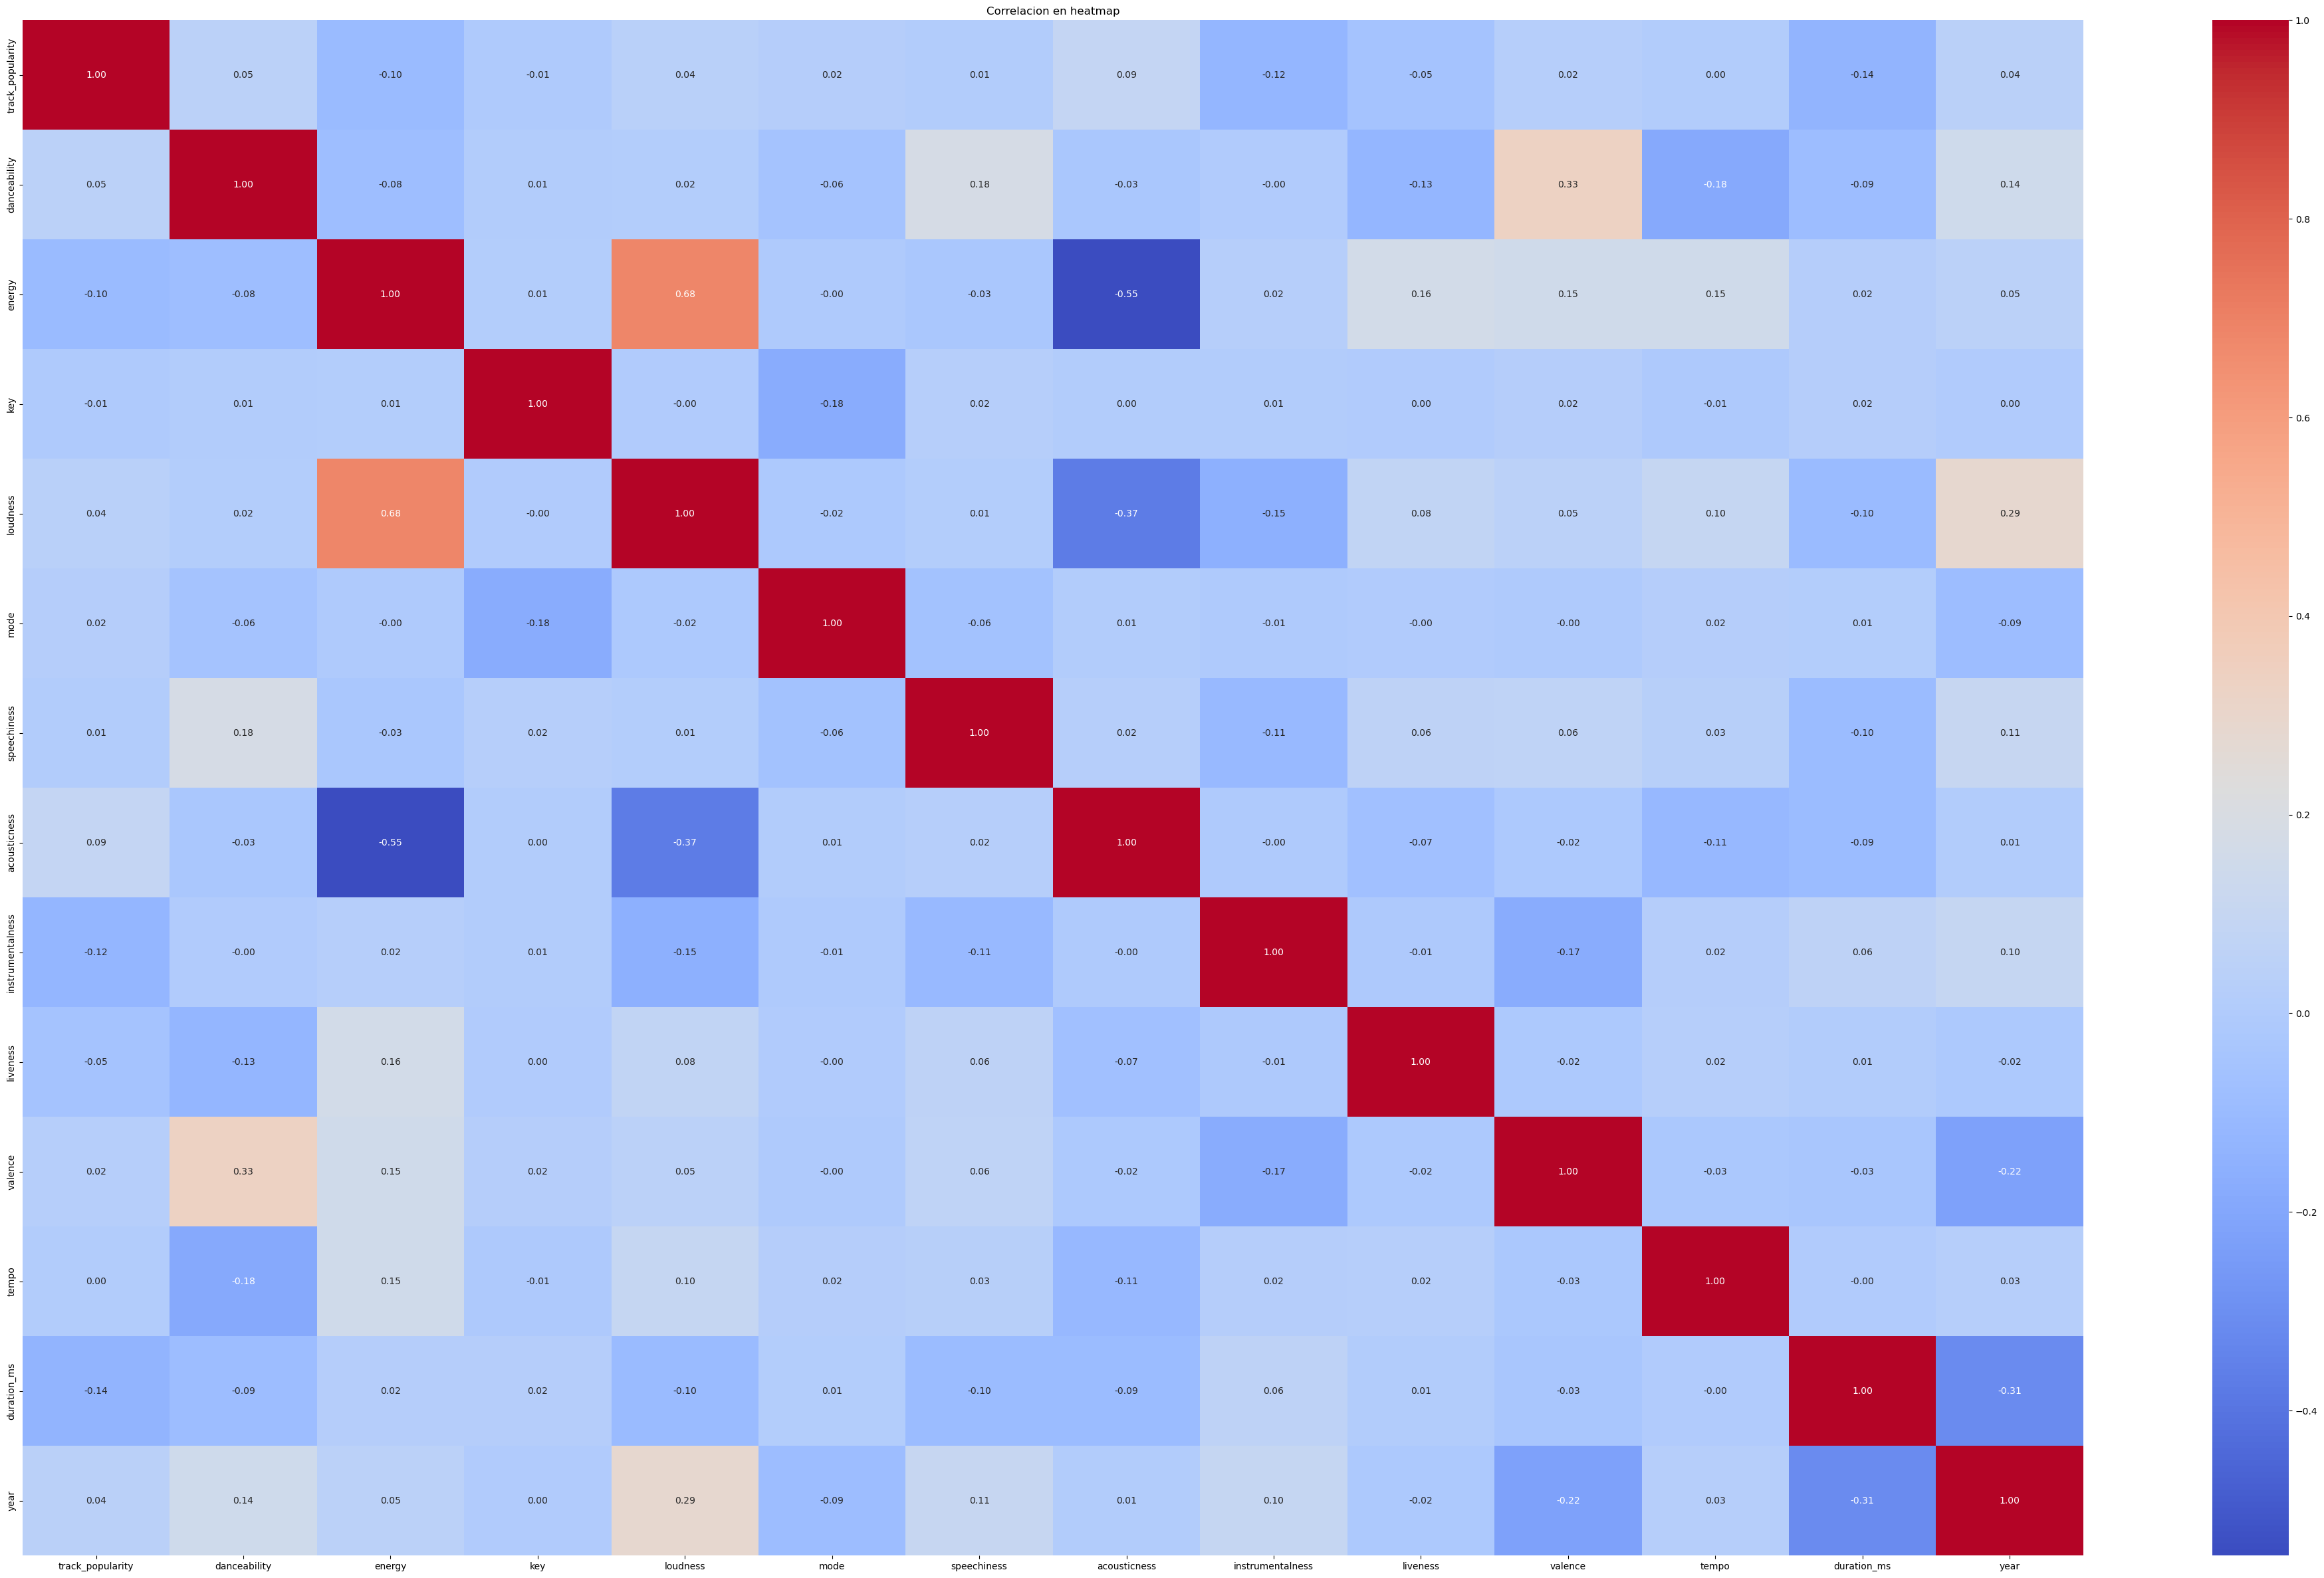

In [55]:
plt.figure(figsize=(50, 30))
sns.heatmap(matriz, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlacion en heatmap')
plt.show()

# Train & test

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    train_size = 0.75,
                                                    test_size = 0.25)

In [45]:
X_train.shape, y_train.shape

((21267, 14), (21267,))

In [47]:
X_test.shape, y_test.shape

((7089, 14), (7089,))

# Multiple Logistic Regression

In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [47]:
# select the numer of variable I want to keep

model = LogisticRegression(max_iter=1000000)
rfe = RFE(model, n_features_to_select=8)

In [51]:
# Fit the model with the training data

rfe = rfe.fit(X_train, y_train)

In [53]:
# With this you get which columns to keep, those that are more relevant for the analysis

rfe.support_

array([ True,  True,  True, False, False, False,  True,  True,  True,
       False,  True, False, False,  True])

In [55]:
# Select those relevant columns

X_train.loc[:,rfe.support_]

,track_popularity,danceability,energy,speechiness,acousticness,instrumentalness,valence,year
24989,-0.393629,0.402158,1.572822,0.936541,-0.778441,0.971355,-0.889265,0.707628
6038,1.083043,-0.386687,0.858924,-0.632383,0.142838,-0.323452,1.112137,0.262353
9634,0.365802,-2.417106,-0.394483,-0.038551,-0.484185,1.990516,-1.251992,0.796683
27166,-1.659347,-0.029992,0.482902,-0.669436,-0.564975,2.089422,-0.040056,0.084244
15535,0.365802,-0.132885,-2.383586,0.527003,-0.666412,3.168786,-0.040056,0.707628
...,...,...,...,...,...,...,...,...
13609,-1.279631,-0.276935,1.311241,-0.706490,-0.609859,-0.357983,1.641292,-1.696855
11291,0.028277,0.717696,0.635491,-0.502695,0.259535,-0.391826,1.666896,-0.271976
27630,-1.659347,-0.372968,-0.105654,1.677612,0.304418,-0.391826,1.427923,-0.271976
12195,-1.659347,-1.717434,0.297616,-0.712340,-0.404741,-0.391814,-1.580580,-0.182921


## Log reg result

In [57]:
modelo = LogisticRegression (max_iter = 1000000)
modelo.fit(X_train.loc[:,rfe.support_], y_train) 

LogisticRegression(max_iter=1000000)

In [59]:
y_pred = modelo.predict(X_test.loc[:,rfe.support_])
y_pred

array([0, 3, 3, ..., 0, 5, 1])

In [61]:
y_prediction_proba = modelo.predict_proba(X_test.loc[:,rfe.support_])
y_prediction_proba

array([[3.24643011e-01, 1.92248679e-01, 3.08228972e-01, 4.48742424e-02,
        8.78792963e-02, 4.21257997e-02],
       [4.54322260e-02, 2.25913415e-01, 1.82470062e-01, 3.02950025e-01,
        6.43973231e-02, 1.78836949e-01],
       [3.10455368e-02, 2.73640071e-01, 2.05640449e-01, 3.22164702e-01,
        1.02105785e-01, 6.54034560e-02],
       ...,
       [6.03929001e-01, 9.35790573e-02, 1.88616716e-01, 2.15688550e-02,
        6.57042015e-02, 2.66021693e-02],
       [2.17624560e-04, 1.40300791e-02, 9.76863186e-02, 3.31005069e-01,
        5.33257643e-02, 5.03735144e-01],
       [1.01059373e-02, 3.90810500e-01, 1.97313931e-01, 2.08990381e-01,
        8.75060416e-02, 1.05273209e-01]])

## Model Evaluation

In [63]:
# Check those which were correctly predicted using y_test 

matriz_confusion = confusion_matrix(y_test, y_pred)
matriz_confusion

array([[770,  77, 196,  32,  97,  27],
       [137, 308, 224, 103, 179,  58],
       [197, 155, 502, 129, 135, 166],
       [ 63, 106, 155, 439, 243, 137],
       [114, 155, 168, 106, 777,  39],
       [101,  27, 121, 100,  10, 736]], dtype=int64)

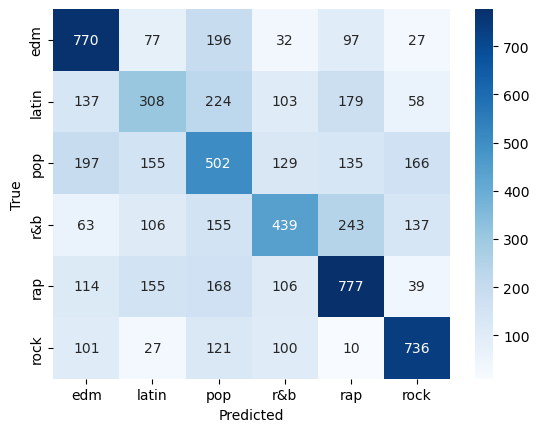

In [65]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [59]:
y_pred = pd.DataFrame(y_pred)
y_pred

,0
0,2
1,3
2,4
3,5
4,5
...,...
8204,4
8205,2
8206,2
8207,2


In [67]:
# Calculate accuracy

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.49823670475384396

In [69]:
# Low Log-Loss: Indicates that the predicted probabilities are close to the true labels.
# A lower log-loss is better.
# Log-Loss > 0.5: Generally indicates that the model is not making good predictions.
# A log-loss significantly greater than 0.5 may indicate that the model is almost random in its predictions.

# Calculate the log-loss
logloss = log_loss(y_test, y_prediction_proba)
logloss

1.3133502189589683

# Hierarchical Clustering

In [73]:
from scipy.spatial import distance_matrix
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet, fcluster


## Distance Matrix

Both functions, pdist from scipy.spatial.distance and distance_matrix from scipy.spatial, are used to calculate distance matrices between data points. The main difference lies in the output they produce and how the distance matrix is stored.

pdist: This function calculates the distance between pairs of data points and returns a condensed one-dimensional array that contains only the unique distances between the points. This format is more storage-efficient for large datasets, as it avoids storing redundant information.

distance_matrix: This function calculates the complete matrix of distances between all pairs of data points and returns a full two-dimensional matrix that includes all the distances between the points. This means that all distances are stored, including redundancies (for example, the distance between point 1 and point 2 is the same as between point 2 and point 1).

In [75]:
dist_matrix = pdist(X, metric='euclidean')

In [77]:
dist_matrix

array([2.81057381, 2.59104393, 1.62678161, ..., 3.93034604, 4.91089275,
       3.76582048])

## Clusterization

Z is the vector where the points are grouped, forming clusters.

It has 4 parts - [p1, p2, distance, number of data points in the cluster]

In [79]:
# Get Z clustering 
Z = linkage(dist_matrix, method='ward')

## Dendrogram/Visualization

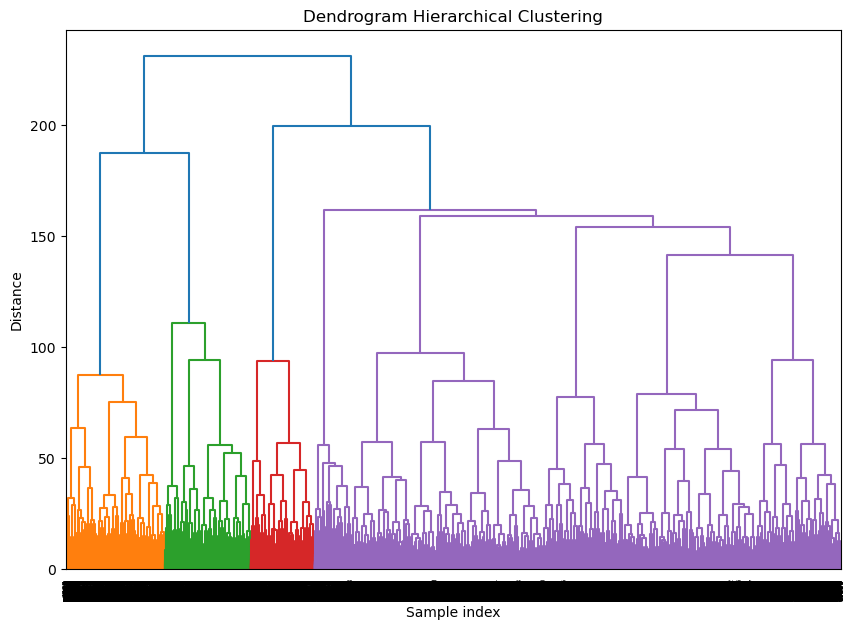

In [81]:
# Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram Hierarchical Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

## Elbow method 

To calculate the number of clusters that make sense and represent the best clustering separation

In [83]:
# Ordered back to front as these are the maximum distances, therefore the separation between one cluster and another is the largest

last = Z[-10:,2] # we only care for the distances column (2)
last_rev = last[::-1]
print(last_rev)

[231.20055383 199.39277277 187.38147076 161.41266214 158.72113569
 154.08945453 141.25077033 110.7280309   97.11482653  94.02432515]


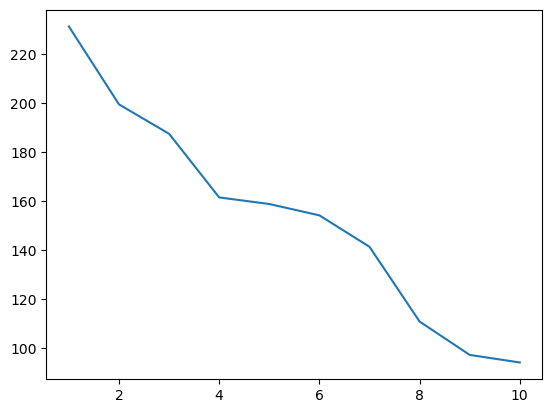

In [85]:
plt.plot(
    range(1, len(last)+1),
    last_rev
)

We need to define the distance that we will use as a cutoff. A distance of 180 seems prudent to determine which data points belong to each cluster. Change it until you get it right. Since we already have a previous result column, we can see how well the separation into playlists was done.

In [93]:
max_d=180
clusters = fcluster(Z, max_d, criterion="distance")
clusters

array([4, 4, 4, ..., 4, 4, 4], dtype=int32)

In [95]:
df["clusters"] = clusters
df.clusters.unique()

array([4, 3, 2, 1])

In [97]:
df[['clusters','playlist_genre']]

,clusters,playlist_genre
0,4,pop
1,4,pop
2,4,pop
3,4,pop
4,4,pop
...,...,...
32828,4,edm
32829,4,edm
32830,4,edm
32831,4,edm


In [99]:
# Count number of songs per cluster
cluster_counts = df['clusters'].value_counts()
print(cluster_counts)

clusters
4    19251
1     3639
2     3135
3     2331
Name: count, dtype: int64


## Evaluation 



In [101]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [103]:
silhouette_avg = silhouette_score(X, clusters)
silhouette_avg

0.11198104674793305

# K-means

In [106]:
from sklearn.cluster import KMeans

In [152]:
# You can choose any cluster number

modelo = KMeans(
    n_clusters = 5,
    n_init = 10,
    max_iter = 300
)
modelo

KMeans(n_clusters=5, n_init=10)

In [154]:
# Fir the model with your estandarized or normalized data

modelo.fit(X)

KMeans(n_clusters=5, n_init=10)

## Elbow method for K means

In [134]:
acum = []

for i in range(1,11):
    modelo = KMeans(
        n_clusters = i,
        n_init = 10,
        max_iter = 300
    )
    modelo.fit(X)
    acum.append(modelo.inertia_)

<Axes: >

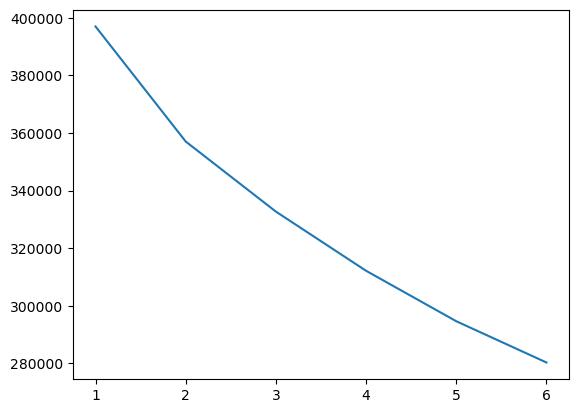

In [135]:
sns.lineplot(
    x = range(1, len(acum[0:6]) + 1),
    y = acum[0:6])

In [ ]:
# Not very useful, as it deems 2 as the most suitable number of clusters
# Definitely now wantign to separete in just 2 genres

In [156]:
modelo = KMeans(
    n_clusters = 5,
    n_init = 10,
    max_iter = 300
)
modelo

KMeans(n_clusters=5, n_init=10)

In [158]:
modelo.fit(X)

KMeans(n_clusters=5, n_init=10)

In [162]:
df_kmeans = df.copy()
df_kmeans["clusters"] = modelo.labels_

In [164]:
df_kmeans.clusters.unique()

array([4, 0, 2, 3, 1])

<Axes: xlabel='clusters', ylabel='count'>

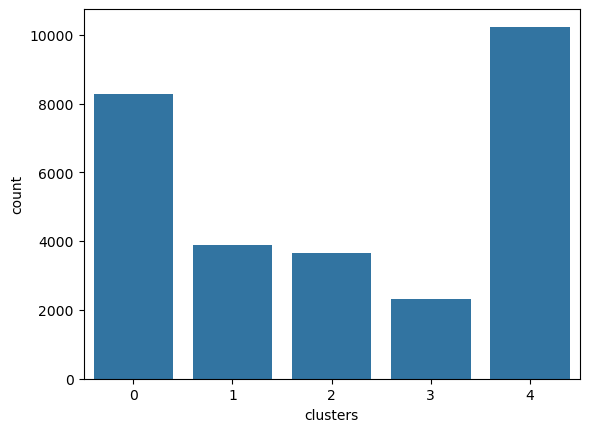

In [166]:
sns.countplot(x = df_kmeans["clusters"])

In [168]:
# Number of songs per cluster
cluster_counts = df_kmeans['clusters'].value_counts()
print(cluster_counts)


clusters
4    10232
0     8262
1     3887
2     3647
3     2328
Name: count, dtype: int64


## Evaluation

In [170]:
df_kmeans[["clusters", 'playlist_genre']]

,clusters,playlist_genre
0,4,pop
1,4,pop
2,4,pop
3,0,pop
4,4,pop
...,...,...
32828,0,edm
32829,0,edm
32830,0,edm
32831,0,edm


In [172]:
silhouette_score(X, df_kmeans["clusters"])

0.09527324260412746

In [ ]:
# Try silhouette_score with different number of clusters

# KNN nearest neighbors

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
# Train the model KNN with the train data
modeloKNN = KNeighborsClassifier(n_neighbors=20)  # Puedes ajustar el número de vecinos (k)
modeloKNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [61]:
# Predict using model on X_test

y_pred = modeloKNN.predict(X_test)
y_pred

array([0, 5, 0, ..., 5, 3, 4])

## Evaluation and Confusion matrix

In [64]:
confusion_matrix(y_test, y_pred)

array([[888,  81, 162,  26,  57,  13],
       [124, 405, 236, 123, 123,  35],
       [255, 173, 550, 109, 116, 100],
       [ 66, 118, 188, 449, 203,  71],
       [122, 144, 142, 145, 769,  25],
       [104,  40, 135, 104,  15, 673]], dtype=int64)

In [67]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5267315559317252

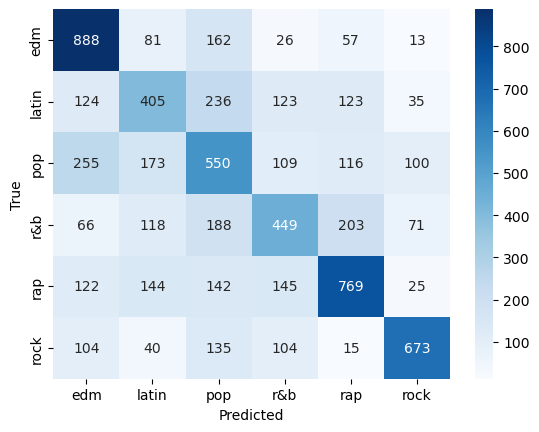

In [71]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Decision trees

In [188]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [190]:
# Create model

modeloTree = DecisionTreeClassifier()

In [192]:
# Fit model

modeloTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [194]:
# Get predicted results

y_pred = modeloTree.predict(X_test)

## Evaluation

In [182]:
accuracy_score(y_test, y_pred)

0.4611369727747214

# Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
# Create model

modeloRF = RandomForestClassifier()

# Fit model

modeloRF.fit(X_train, y_train)

In [60]:
y_pred = modeloRF.predict(X_test)
y_pred

array([5, 2, 0, ..., 4, 3, 0])

## Evaluation

In [62]:
accuracy_score(y_test, y_pred)

0.611369727747214

In [64]:
from sklearn.model_selection import cross_val_score

In [66]:
# Crossvalidation to confirm accuracy of the model

scores = cross_val_score(modeloRF, X_train, y_train, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean Score:", np.mean(scores))
print("Standard Deviation:", np.std(scores))

Cross-Validation Scores: [0.60155148 0.60084626 0.5998119  0.60004703 0.59440395]
Mean Score: 0.5993321233132706
Standard Deviation: 0.0025395402982286218


# Neural Networks

In [70]:
from keras.models import Sequential
from tensorflow.keras import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras.optimizers import SGD

In [50]:
# Inicialize neural network

model = Sequential()

In [53]:
# Add layers - Input layer

model.add(Input(shape=(14,)))

# Add neuron

model.add(Dense(units = 50, # 50 neurons
                 activation = 'relu'))

# add as many as you want/is effective and suitable

model.add(Dense(units = 50, # 50 neurons
                 activation = 'relu'))

In [72]:
# prevent overfitting
# "turns off" 0.2 (20%) of the units per layer

model.add(Dropout(0.2))

In [74]:
# Output layer

model.add(Dense(len(np.unique(df['playlist_genre'])), activation='softmax'))

In [78]:
# Compile the model
# loss is the loss function -> method to calculate the error
# optimizer -> adjusts the learning rate (how much each parameter is modified in each iteration)
# 'adam' updates it automatically

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [82]:
# validation_split keeps 0.2 of the training data for internal mini test
# 532/32 batches and 0.8 (without validation) of the data

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2865 - loss: 1.7170 - val_accuracy: 0.4267 - val_loss: 1.5383
Epoch 2/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3805 - loss: 1.5426 - val_accuracy: 0.4598 - val_loss: 1.4608
Epoch 3/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4159 - loss: 1.4770 - val_accuracy: 0.5061 - val_loss: 1.3901
Epoch 4/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4603 - loss: 1.4108 - val_accuracy: 0.5244 - val_loss: 1.3378
Epoch 5/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4710 - loss: 1.3770 - val_accuracy: 0.5329 - val_loss: 1.3134
Epoch 6/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4816 - loss: 1.3493 - val_accuracy: 0.5376 - val_loss: 1.2889
Epoch 7/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4844 - loss: 1.3407 - val_accuracy: 0.5402 - val_loss: 1.2705
Epoch 8/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4736 - loss: 1.3503 - val_accu

## Evaluation

In [87]:
loss, accuracy = model.evaluate(X_test, y_test)

222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5601 - loss: 1.2168


In [89]:
print("Accuracy:", accuracy)

Accuracy: 0.5566370487213135


In [92]:
# Check probability for each genre

y_pred_prob= model.predict(X_test).round(2)

222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [98]:
# Check final probability - what genre it is

y_pred = np.argmax(y_pred_prob, axis=1)

In [103]:
confusion_matrix(y_test, y_pred)

array([[862,  91, 150,  29,  80,  29],
       [ 92, 408, 185, 117, 185,  57],
       [185, 180, 495, 118, 130, 166],
       [ 42,  93, 169, 498, 234, 106],
       [ 58, 116,  77, 152, 864,  27],
       [ 43,  24, 128,  62,  18, 819]], dtype=int64)

# PCA dimensionality reduction

In [198]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [200]:
for i in range(2, 9):   
   
    # apply pca
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X)
    

    # verify variance explained
    print(f'Variance explainedd by {i} main components: {np.sum(pca.explained_variance_ratio_):.2f}')

    # split data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    # train the model
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)

    # preddict on the test set
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Random fores prediction accuracy: {accuracy:.2f}')

Variance explainedd by 2 main components: 0.27
Random fores prediction accuracy: 0.29
Variance explainedd by 3 main components: 0.38
Random fores prediction accuracy: 0.37
Variance explainedd by 4 main components: 0.46
Random fores prediction accuracy: 0.41
Variance explainedd by 5 main components: 0.54
Random fores prediction accuracy: 0.44
Variance explainedd by 6 main components: 0.62
Random fores prediction accuracy: 0.47
Variance explainedd by 7 main components: 0.69
Random fores prediction accuracy: 0.50
Variance explainedd by 8 main components: 0.75
Random fores prediction accuracy: 0.51


In [51]:
# Get your PCAs using your standarized data

pca = PCA(n_components=8)
X_pca = pca.fit_transform(X)

pca.singular_values_

array([249.58330608, 214.95657305, 202.5630237 , 186.14271034,
       178.76397195, 172.10562993, 165.69906882, 156.80248903])

In [53]:
# Get a dataframe of your "new table" with PCAs

X_pca_tabla = pd.DataFrame(X_pca, columns = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7','PCA8'])
X_pca_tabla

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8
0,-1.567486,-1.061086,0.219311,-0.988931,-0.652553,-1.306785,-0.066228,0.125314
1,-1.099515,-1.224697,-0.138175,-0.306196,0.380080,-0.695076,-1.518342,1.616463
2,-1.656642,-1.268893,0.350056,-0.796167,-0.194626,-1.064385,-0.051712,-0.222765
3,-1.665993,-0.744143,0.951378,-0.764360,-0.118289,-0.498571,-0.441445,0.117427
4,-1.056415,-0.787990,-0.070224,-1.888355,-0.974023,-0.940712,0.063020,0.281339
...,...,...,...,...,...,...,...,...
28351,-1.775877,0.847626,1.306681,-1.614533,-0.314930,-0.539148,-0.000484,-1.164912
28352,-1.291735,2.238782,-0.192375,-0.875760,-0.544495,0.970735,-0.559679,-0.973948
28353,-1.061683,0.536186,0.548755,0.676973,0.459072,-0.490130,-0.061052,-0.644926
28354,-1.744226,1.929760,-0.086729,-0.057904,-0.808692,1.166097,-0.240920,-1.066575


In [55]:
# Confirm variables are not correlated 

X_pca_tabla.corr().round(2)

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8
PCA1,1.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0
PCA2,0.0,1.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0
PCA3,-0.0,-0.0,1.0,0.0,0.0,-0.0,0.0,0.0
PCA4,-0.0,-0.0,0.0,1.0,0.0,-0.0,-0.0,0.0
PCA5,-0.0,-0.0,0.0,0.0,1.0,0.0,-0.0,0.0
PCA6,-0.0,0.0,-0.0,-0.0,0.0,1.0,0.0,0.0
PCA7,0.0,0.0,0.0,-0.0,-0.0,0.0,1.0,-0.0
PCA8,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,1.0


In [57]:
# What % of the data is explained in each PCA
# As we can see, no PCA has a very significant representation 

pca.explained_variance_ratio_

array([0.15691269, 0.11639343, 0.10335877, 0.08728087, 0.08049835,
       0.07461346, 0.06916193, 0.06193454])

## Random Forest - PCAs

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_tabla,y,
                                                    train_size = 0.75,
                                                    test_size = 0.25)

In [76]:
modeloRF = RandomForestClassifier()

modeloRF.fit(X_train, y_train)

y_pred = modeloRF.predict(X_test)
y_pred

array([5, 3, 5, ..., 1, 1, 1])

In [78]:
accuracy_score(y_test, y_pred)

0.5157285935957117

## KNN - PCAs

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_tabla,y,
                                                    train_size = 0.75,
                                                    test_size = 0.25)

In [62]:
# Create and fit KNN model
modeloKNN = KNeighborsClassifier(n_neighbors=20)  # you can adjust the number of neighbors (k)
modeloKNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [65]:
y_pred = modeloKNN.predict(X_test)
y_pred

array([2, 1, 3, ..., 4, 5, 2])

In [68]:
confusion_matrix(y_test, y_pred)

array([[838,  57, 153,  41,  84,  23],
       [121, 379, 218, 126, 174,  35],
       [256, 214, 469, 122, 105, 118],
       [ 60, 116, 179, 441, 219, 101],
       [122, 156, 160, 171, 730,  30],
       [133,  44, 119, 109,  17, 649]], dtype=int64)

In [71]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.4945690506418395

# Recommendation System with KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity

In [61]:
# Create and fit model - I use cosine distance here

k = 5

neighbors = NearestNeighbors(n_neighbors = k, metric = 'cosine')

neighbors.fit(X)

NearestNeighbors(metric='cosine')

In [67]:
# return_distance=True, returns a list with the distance of each point/song to its 5 nearest neighbors

top_k_distances, top_k_canciones = neighbors.kneighbors(X, return_distance=True)
top_k_distances.shape
top_k_distances

array([[1.11022302e-16, 5.47405475e-02, 6.14273981e-02, 6.21599218e-02,
        7.13619185e-02],
       [2.22044605e-16, 2.67075510e-02, 3.40696186e-02, 4.73930367e-02,
        5.64136315e-02],
       [1.11022302e-16, 4.22835106e-02, 4.46967577e-02, 4.57934421e-02,
        5.01375573e-02],
       ...,
       [4.44089210e-16, 4.49416007e-02, 5.27829346e-02, 5.84467840e-02,
        6.93879249e-02],
       [0.00000000e+00, 7.77797284e-02, 8.94170004e-02, 1.06584511e-01,
        1.15610215e-01],
       [2.22044605e-16, 8.31306909e-02, 8.60729778e-02, 9.47435655e-02,
        1.00501083e-01]])

In [42]:
def recommend_songs(track_name):
    
    # Training the KNN model
    # Using euclidean distance here
    # Using X standarized data 
    knn = NearestNeighbors(n_neighbors=6, metric='euclidean')
    knn.fit(X)

    # Find the index of the given song
    # [df['track_name'] == track_name] is a specific song and with df.index it returns the index
    # Using [0] to get the first index with that result
    song_idx = df.index[df['track_name'] == track_name][0]

    # Find songs similar to that index
    # Using the knn model that was made earlier with k=5
    distances, songs = knn.kneighbors([X[song_idx]])

    # Recommendations
    # [0] because it is the first list of neighbors 
    # [1:] because in songs it brings itself as [0] (which is actually the closest)
    # df.iloc -> rows are indices[0][1:] and columns [['track_name', 'track_artist']]
    recommendations = df.iloc[songs[0][1:]][['track_name', 'track_artist']]
    
    print(songs)

    return recommendations


recommend_songs('Someone You Loved - Future Humans Remix')

[[    4  1539   292  4348 27114   548]]


,track_name,track_artist
1593,Safe And Sound,Capital Cities
292,Be Your Friend‬‬,Vigiland
4639,Bad At Love,Halsey
31357,Who You Are (feat. MIO),Syn Cole
548,Safety (feat. DJ Snake),GASHI


In [44]:
 def recomendar_cancion(track_name):

    knn = NearestNeighbors(n_neighbors=6, algorithm='auto', metric = 'euclidean')
    knn.fit(X)

    cancion_idx = df.index[df['track_name'] == track_name][0]

    distances, canciones = knn.kneighbors([X[cancion_idx]])

    recomendaciones = df.loc[canciones[0][1:], ['track_name', 'track_artist']]
    
    print(canciones)

    return recomendaciones


recomendar_cancion('Joker And The Thief')

[[ 7419  5750 19406  5814 14148  7898]]


,track_name,track_artist
5750,Leavin',Brenky
19406,Te Siento,Wisin & Yandel
5814,Suede Gully,Puma
14148,Out The Window,Violent Femmes
7898,Lost Ones,J. Cole


# Conclusion



After experimenting with various machine learning algorithms, we found that the Random Forest model achieved the highest accuracy for genre prediction, with a performance of 61% accuracy. Despite trying different optimization techniques, such as cross-validation, this was the best result we obtained. The use of PCAs did not enhance the accuracy of our models due to the low correlation among our initial variables. 

For accurate genre classification, it is necessary to consider subjective variables. Besides, genre classification involves subjectivity that would need to be encoded for inclusion in a machine learning analysis. We can conclude that additional more informative features are needed for a more precise analysis, and to some extent, achieving higher accuracy becomes challenging when subjective variables must be incorporated.

This aligns with the recommendation model, where we successfully recommend songs based on nearest neighbors in KNN with similar characteristics, though not necessarily of the same genre. This content-based song recommendation has been effective in suggesting similar songs, facilitating the discovery of new tracks, and offering customers the opportunity to explore new music they might not have selected otherwise.